## Observations and Insights 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [100]:
# Checking the number of mice.
len(mouse_study_complete["Mouse ID"].unique())

249

In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_complete["Mouse ID"].duplicated().any()

True

In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df= mouse_study_complete[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [104]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_study_gb = mouse_study_df.groupby(["Drug Regimen"])
tumor_volume = mouse_study_gb["Tumor Volume (mm3)"]
mouse_mean = mouse_study_gb["Tumor Volume (mm3)"].mean()
mouse_median = mouse_study_gb["Tumor Volume (mm3)"].median()
mouse_var = mouse_study_gb["Tumor Volume (mm3)"].var()
mouse_std = mouse_study_gb["Tumor Volume (mm3)"].std()

mouse_tumor_volume_df = pd.DataFrame({"Mean of Tumor Volume": mouse_mean, 
                                       "Median of Tumor Volume": mouse_median, 
                                       "Variance of Tumor Volume": mouse_var,
                                      "Standard Deviation of Tumor Volume": mouse_std})
mouse_tumor_volume_df


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

In [131]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
drug_and_timepoint = mouse_study_df[["Drug Regimen","Timepoint"]]

# Set the index to be "State" so they will be used as labels
drug_and_timepoint = drug_and_timepoint.set_index("Drug Regimen")

#groupby Drug Regimen, and sum the timepoints for y axis
drug_and_timepoint = drug_and_timepoint.groupby("Drug Regimen")

#print data to be plotted
drug_and_timepoint = drug_and_timepoint.count()
drug_and_timepoint

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


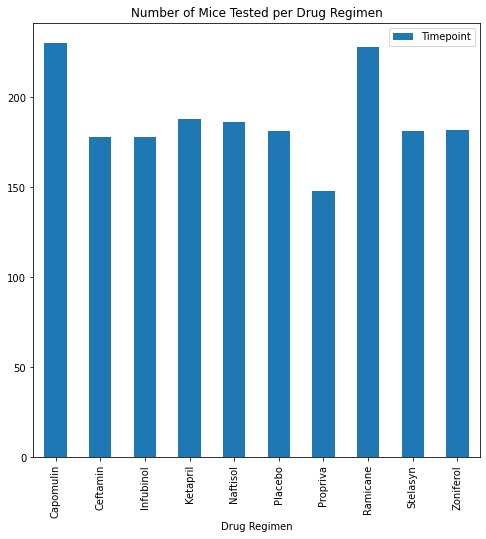

In [132]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_and_timepoint.plot(kind="bar", figsize=(8,8))

# Set a title for the chart and show chart
plt.title("Number of Mice Tested per Drug Regimen")

plt.show()

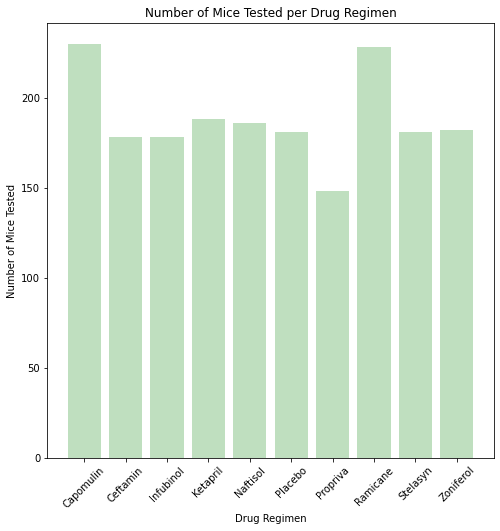

In [146]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(8,8))
plt.bar(drug_and_timepoint.index, drug_and_timepoint["Timepoint"], color='g', alpha=.25, align="center")

# Set a Title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(drug_and_timepoint.index, rotation="45")  

# Save our graph and show the grap
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
